# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Reading Data 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Scatter plot

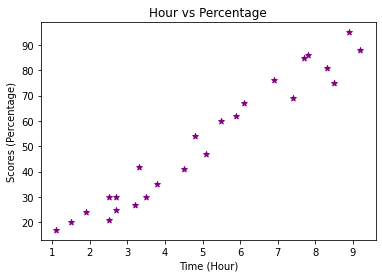

In [7]:
%matplotlib inline
plt.scatter(df.Hours,df.Scores,color='Purple' ,marker='*')
plt.title('Hour vs Percentage')
plt.xlabel('Time (Hour)')
plt.ylabel('Scores (Percentage)')
plt.show()                                                         # We can conclude that there are no outliers in the given plot

# Splitting the values into test and train

In [12]:
#Preparing the data since there are no outliers
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
X
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Training and testing


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


## Testing with given data

In [21]:
print(reg.predict([[]]))

[96.16939661]


## Real vs Prediciton

In [25]:
check  = pd.DataFrame({'Real' : y_test,'Predicted':y_pred})
check

,Real,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Regression Plot


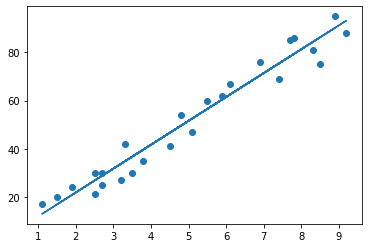

In [19]:
m =reg.coef_
c =reg.intercept_
line = m*X+c
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

# Error  Calc

In [20]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('R2 Score : ',r2_score(y_test,y_pred))                                     # The R2 score : ground truth vs estimatd values

R2 Score :  0.9454906892105355
